In [66]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations


In [67]:
point = np.array([80,150])

start = 0
end = 20000
start_mlda = 0
end_mlda = 20000

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_levels_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_levels_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_levels_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_1_mlda.h5')
mlda_samples = np.array( fin['/samples'] )
fin.close()


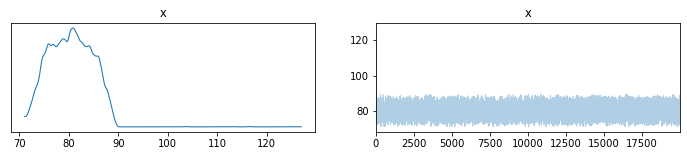

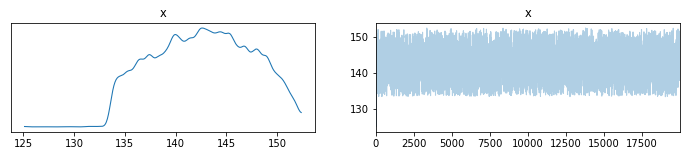

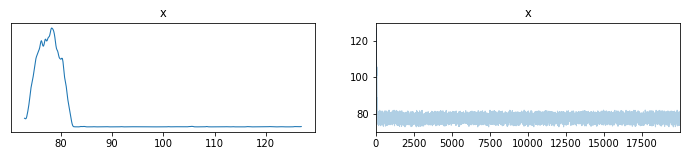

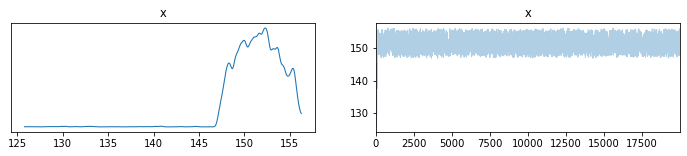

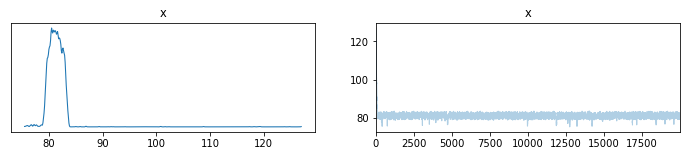

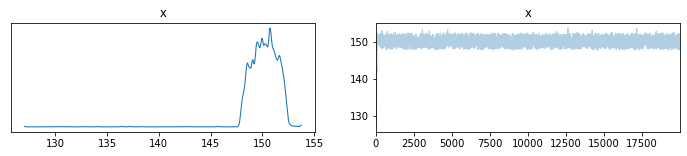

In [68]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,start:end])
    az.plot_trace(s[1,start:end])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

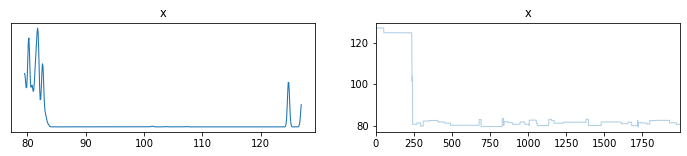

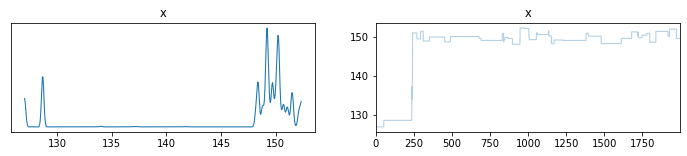

In [69]:
az.plot_trace(mlda_samples[0,start_mlda:])
az.plot_trace(mlda_samples[1,start_mlda:])

In [70]:
for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:end], axis=1)
    print("Mean = " + str(mean))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")


print("MLDA :")
mean = np.mean(mlda_samples[:,start_mlda:end_mlda], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))


Level 0:
Mean = [ 80.31787013 142.68111845]
DLE = 7.3257810906235505


Level 1:
Mean = [ 77.66556208 151.4981873 ]
DLE = 2.773835892751366


Level 2:
Mean = [ 81.32288726 150.18510155]
DLE = 1.3357744123882778


MLDA :
Mean = [ 86.45972395 147.31325348]
DLE = 6.99618756095391


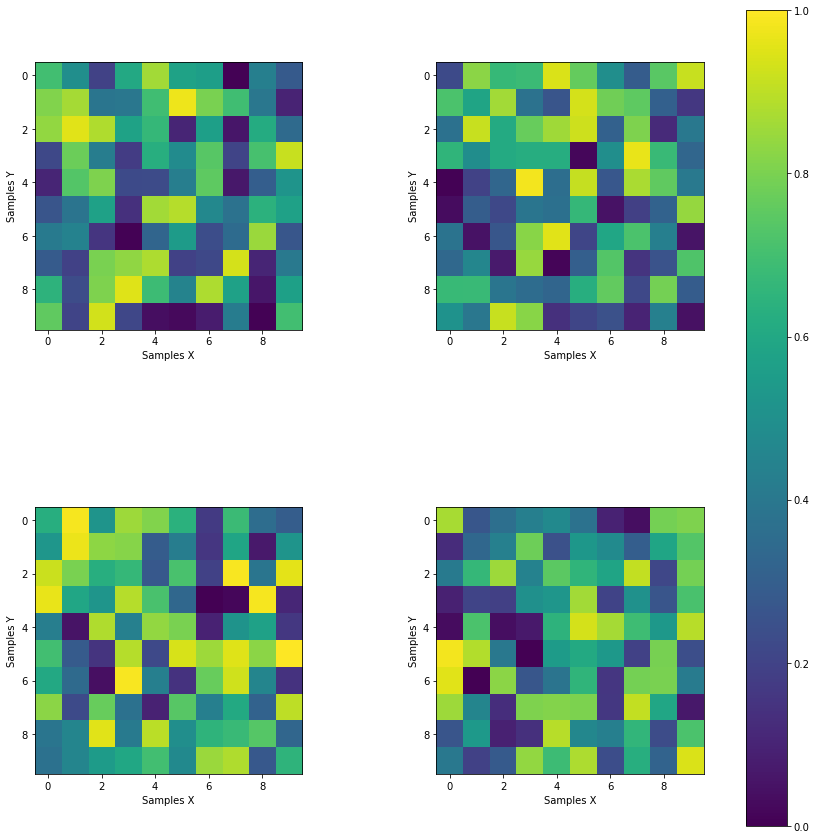

In [76]:
path_meshs = [
        "data/mesh_1.msh",
        "data/mesh_2.msh",
        "data/mesh_3.msh"]

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

evaluations.draw_cells(path_meshs[0],samples[0][:,start:end],ax[0,0])
evaluations.draw_cells(path_meshs[1],samples[1][:,start:end],ax[0,1])
evaluations.draw_cells(path_meshs[2],samples[2][:,start:end],ax[1,0])
evaluations.draw_cells(path_meshs[2],mlda_samples[:,start_mlda:end_mlda],ax[1,1])

evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)

for axis in ax.flat:
    im = evaluations.draw_cells(path_meshs[0],samples[0][:,start:end],axis)
    evaluations.set_ax(axis,point)

plt.colorbar(im, ax=ax.ravel().tolist())
  
plt.show()

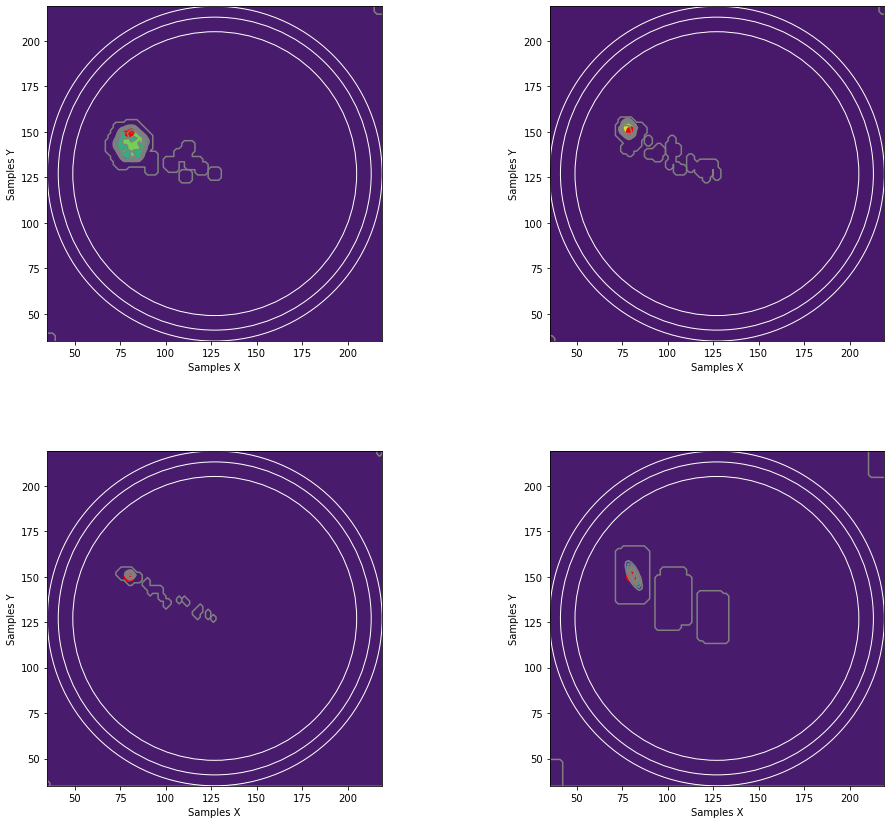

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(wspace=.5)

evaluations.draw_densities(samples[0][:,start:end],ax[0,0])
evaluations.draw_densities(samples[1][:,start:end],ax[0,1])
evaluations.draw_densities(samples[2][:,start:end],ax[1,0])
evaluations.draw_densities(mlda_samples[:,start_mlda:end_mlda],ax[1,1])

#point = (80,150)
evaluations.set_ax(ax[0,0],point)
evaluations.set_ax(ax[0,1],point)
evaluations.set_ax(ax[1,0],point)
evaluations.set_ax(ax[1,1],point)